<center><img src="https://is1-ssl.mzstatic.com/image/thumb/Purple122/v4/05/e7/67/05e76784-3364-b535-7e20-b3f4946a56b6/AppIcon-0-0-1x_U007emarketing-0-0-0-7-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/434x0w.webp" style="height:150px"></center>

<hr style="border-width:2px;border-color:red">
<center><h1>Test Technique Data Scientist</h1></center>
<center><h2> Mesure de la dérive </h2></center>
<hr style="border-width:2px;border-color:red">

# Contexte

La **dérive** en apprentissage automatique (ou **"drift"** en anglais) fait référence à un **changement dans les données d'entrée ou de sortie d'un modèle** de machine learning **après son entraînement initial**. Cela peut se produire lorsque les données utilisées pour entraîner le modèle ne **reflètent plus la réalité**, ou lorsque **les conditions du problème changent de manière significative**.

La dérive des données peut affecter la précision du modèle de manière significative et peut entraîner des erreurs coûteuses dans les prévisions ou les décisions basées sur le modèle. Par conséquent, **il est important de surveiller régulièrement les performances du modèle** et de le mettre à jour en fonction des nouveaux jeux de données ou des nouvelles conditions du problème.

# Objectif

Dans ce test, vous allez implémenter des métriques permettant de mesurer la dérive d'un modèle dans un usecase de **e-commerce** où nous essayons de prédire le **panier total** (variable **`TotalCart`** : chiffre d'affaire total d'un client sur la période donnée) des clients en fonction des variables suivantes:
* **`Age`** : âge du client en années.
* **`Seniority`** : ancienneté du client en années.
* **`Orders`** : Nombre de commandes effectuées sur la période précédente.
* **`Items`** : Nombre d'items commandés sur la période précédente.
* **`AverageDiscount`** : Réduction moyenne accordée au client sur la période précédente en pourcentage.
* **`TopCategory`** : Catégorie de produits favorite du client.
* **`BrowsingTime`** : Temps total passé sur le site web sur la période précédente en secondes.
* **`EmailsOpened`** : Nombre de mails marketing ouverts par le client sur la période précédente.
* **`SupportInteractions`** : Nombre d'interactions que le client a eu avec le service client sur la période précédente.

Le jeu de données est décomposé en 4 périodes correspondant aux 4 trimestres de l'année 2022. Vous trouverez les données correspondant à chaque période dans les fichiers **`period_0.csv`**, **`period_1.csv`**, ..., **`period_3.csv`**.

Vous allez d'abord **entraîner et évaluer un modèle de machine learning** sur les données de la **période 0**. On supposera que ce modèle sera utilisé pour effectuer les prédictions de panier total sur toute l'année 2022.

Ensuite, vous devrez **implémenter des métriques de dérive** qui vous seront données et **effectuer une analyse** de celle-ci.

# Entraînement du modèle

* **Entraînez et validez** deux ou trois modèles de votre choix sur les données de la période 0. 

**Conseils**

* Vous serez évalué sur votre **rigueur** et non sur les performances du modèle.


* Il n'est pas nécessaire de faire une analyse exploratoire des données.


* Il n'est pas nécessaire de faire de recherche d'hyperparamètres optimaux non plus mais vous pouvez le faire si vous le souhaitez.

In [99]:
# Import libraries

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
    "grid.color":     "white",
    "grid.alpha":     1,
    "grid.linestyle": "--",
    "legend.frameon":       True,
    "legend.facecolor":     "#d8d8d8",
    "lines.linewidth": 1,
})

In [100]:
# Import data on period 0

df0 = pd.read_csv('data/period_0.csv')
df1 = pd.read_csv('data/period_1.csv')
df2 = pd.read_csv('data/period_2.csv')
df3 = pd.read_csv('data/period_3.csv')

df0.head()

,Age,Seniority,Orders,Items,AverageDiscount,TopCategory,BrowsingTime,EmailsOpened,SupportInteractions,TotalCart
0,21,2,4,7,0.14,"Clothing,Shoes & Jewelry",68.473629,3,2,34.00
1,22,0,4,5,0.50,Toys & Games,29.258063,1,0,28.28
2,22,1,2,6,0.37,"Health, Household & Baby Care",11.515517,0,0,19.33
3,19,0,2,8,0.60,Toys & Games,74.495861,1,0,26.83
4,25,1,1,5,0.58,Toys & Games,1.682705,2,1,17.67


In [101]:
n_features = df0.shape[1]
n_samples = df0.shape[0]

print('Number of features: ', n_features)
print('Number of samples: ', n_samples)

Number of features:  10
Number of samples:  1000


In [102]:
# Prepare Training Data 

X0 = df0.iloc[:, 0:n_features-1]
y0 = df0.iloc[:, n_features-1]

# Prepare Test Data

X1 = df1.iloc[:, 0:n_features-1]
y1 = df1.iloc[:, n_features-1]

X2 = df2.iloc[:, 0:n_features-1]
y2 = df2.iloc[:, n_features-1]

X3 = df3.iloc[:, 0:n_features-1]
y3 = df3.iloc[:, n_features-1]

# Create dummy variables for categorical features

X0 = pd.get_dummies(X0)
X1 = pd.get_dummies(X1)
X2 = pd.get_dummies(X2)
X3 = pd.get_dummies(X3)

In [144]:
def train_and_test(model, X0, X1, X2, X3, y0, y1, y2, y3, mode = None):

    # Train the model
    if mode == None:
        model.fit(X0, y0)
    if mode == 'kmm':
        model.fit_estimator(X0, y0, sample_weights = model.weights_)

    # Predict the model

    y_pred_0 = model.predict(X0)
    y_pred_1 = model.predict(X1)
    y_pred_2 = model.predict(X2)
    y_pred_3 = model.predict(X3)

    # Compute metrics

    r2_0 = r2_score(y0, y_pred_0)

    r2_1 = r2_score(y1, y_pred_1)
    mse_1 = mean_squared_error(y1, y_pred_1)

    r2_2 = r2_score(y2, y_pred_2)
    mse_2 = mean_squared_error(y2, y_pred_2)

    r2_3 = r2_score(y3, y_pred_3)
    mse_3 = mean_squared_error(y3, y_pred_3)

    # print('R2 score for period 1: ', r2_1)
    # print('MSE for period 1: ', mse_1)

    # print('R2 score for period 2: ', r2_2)
    # print('MSE for period 2: ', mse_2)

    # print('R2 score for period 3: ', r2_3)
    # print('MSE for period 3: ', mse_3)

    # Plot results

    plt.rcParams["grid.alpha"] = 1

    fig, ax = plt.subplots(1,3,figsize=(15, 5))

    ax[0].scatter(y1, y_pred_1, edgecolors=(0, 0, 0), label='Prediction, $R^2$ = %.3f' % r2_1)
    ax[0].plot([y1.min(), y1.max()], [y1.min(), y1.max()], 'k--', lw=4, label='Perfect prediction $y=x$')
    ax[0].set_xlabel('Target Data')
    ax[0].set_ylabel('Predicted data')
    ax[0].set_title('Period 1')
    ax[0].legend()

    ax[1].scatter(y2, y_pred_2, edgecolors=(0, 0, 0), label='Prediction, $R^2$ = %.3f' % r2_2)
    ax[1].plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'k--', lw=4, label='Perfect prediction $y=x$')
    ax[1].set_xlabel('Target Data')
    ax[1].set_ylabel('Predicted data')
    ax[1].set_title('Period 2')
    ax[1].legend()

    ax[2].scatter(y3, y_pred_3, edgecolors=(0, 0, 0), label='Prediction, $R^2$ = %.3f' % r2_3)
    ax[2].plot([y3.min(), y3.max()], [y3.min(), y3.max()], 'k--', lw=4, label='Perfect prediction $y=x$')
    ax[2].set_xlabel('Target Data')
    ax[2].set_ylabel('Predicted data')
    ax[2].set_title('Period 3')
    ax[2].legend()

    fig.suptitle('Predictions of model {}, $R^2$ = {}'.format(model.__class__.__name__, r2_0), fontsize=16)


    plt.show()
        

* **Entrainez votre modèle sur toute la période 0** puis **testez votre modèle** sur les données des **périodes 1, 2 et 3**. Comment évolue la performance du modèle?

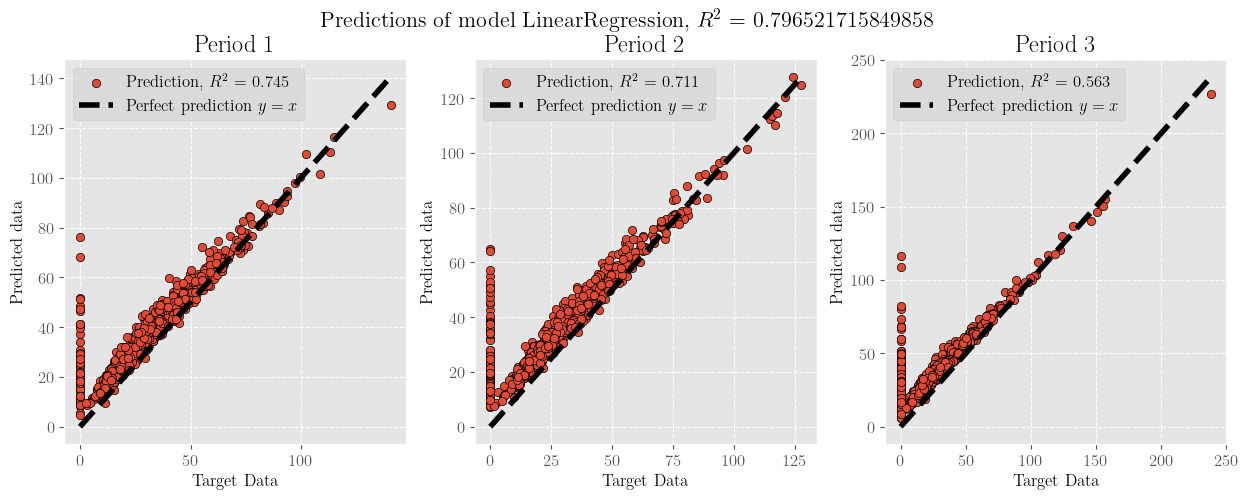

In [104]:
# # First model : linear regression

# Define the model

from sklearn.linear_model import LinearRegression
model1 = LinearRegression(fit_intercept=True)

# Train and test the model

train_and_test(model1, X0, X1, X2, X3, y0, y1, y2, y3)

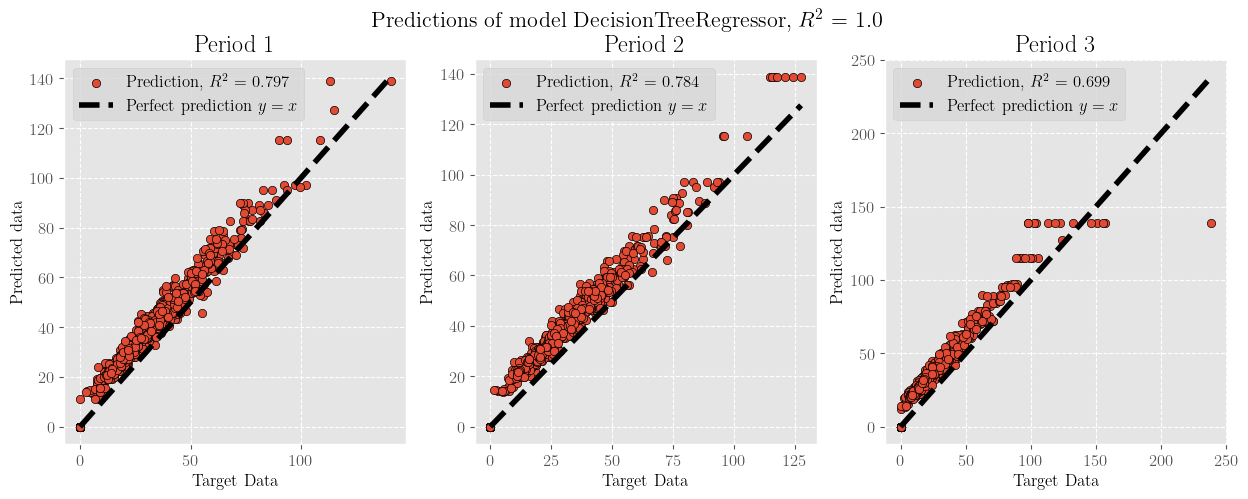

In [105]:
# # Second Model : Random Tree

# Define the model

from sklearn.tree import DecisionTreeRegressor

model2 = DecisionTreeRegressor(max_depth=None)

# Train and test the model

train_and_test(model2, X0, X1, X2, X3, y0, y1, y2, y3)

Les prédictions effectuées par les modèles entraînés sur la période 0 sur les périodes suivantes témoignent bien du shift dans les données. En effet, les performances du modèle sur les périodes 1, 2 et 3 sont dégréssives.

# Mesure de la dérive de variables catégorielles.

Pour deux distributions de probabilités discrètes $P$ et $Q$, la **divergence de Kullback–Leibler** de $P$ par rapport à $Q$ est définie par:

$$D_\text{KL}(P \parallel Q) = \sum_{x\in\mathcal{X}} P(x) \log\left(\frac{P(x)}{Q(x)}\right)$$


On définit la **divergence de Jensen-Shannon** comme une version lisse et symétrique de la divergence de Kullback-Leiber donnée par la formule suivante:

$${\rm JSD}(P \parallel Q)= \frac{1}{2}D(P \parallel M)+\frac{1}{2}D(Q \parallel M)$$

où $M=\frac{1}{2}(P+Q)$

### Exemple de calcul de $D_\text{KL}(P \parallel Q)$ : 

Soient $P$ =`[0.2, 0.3, 0.5]` et $Q$ =`[0.2, 0.4, 0.4]` deux vecteurs définissant une loi de probabilité discrete. Alors : 

$$
\begin{equation}
\begin{split}
D_\text{KL}(P \parallel Q) & = P(0) \log\left(\frac{P(0)}{Q(0)}\right)
                             + P(1) \log\left(\frac{P(1)}{Q(1)}\right)
                             + P(2) \log\left(\frac{P(2)}{Q(2)}\right)\\ \\
                           & = 0.2 \log\left(\frac{0.2}{0.2}\right)
                             + 0.3 \log\left(\frac{0.3}{0.4}\right)
                             + 0.5 \log\left(\frac{0.5}{0.4}\right) \\ \\
                           & = 0.02526...
\end{split}
\end{equation}
$$

### Exercice

* Implémenter des fonctions nommées **`KLDivergence(P, Q)`** et **`JSDivergence(P, Q)`** permettant de calculer les métriques définies ci-dessus.

**Conseils**:
* Utiliser la librairie Numpy permettant de facilement effectuer des calculs d'algèbre linéaire.

In [106]:
import numpy as np 

P = np.array([0.2, 0.3, 0.5])
Q = np.array([0.2, 0.4, 0.4])

def KLDivergence(P, Q):
    
    return np.sum(P * np.log(P/Q))

def JSDivergence(P, Q):
    
    M = 0.5 * (P + Q)

    return 0.5 * (KLDivergence(P, M) + KLDivergence(Q, M))
    

* Lancer la cellule suivante pour tester votre fonction.

In [107]:
print("K-L Divergence:", KLDivergence(P, Q))
print("J-S Divergence:", JSDivergence(P, Q))

K-L Divergence: 0.02526715392157057
J-S Divergence: 0.006367198333995731


# Mesure de la dérive de variables quantitatives.

Soit $P$ une mesure empirique d'échantillons $X_1, \ldots, X_n
$ et $Q$ une mesure empirique d'échantillons $Y_1, \ldots, Y_n$, on définit la **Distance de Wasserstein** d'ordre $p$ par la fonction suivante :

$$W_p(P, Q) = \left( \frac{1}{n}\sum_{i=1}^n \|X_{(i)} - Y_{(i)}\|^p \right)^{1/p}$$

où $X_{(1)}, \ldots, X_{(n)}$ et $Y_{(1)}, \ldots, Y_{(n)}$ sont les [**statistiques d'ordre**](https://en.wikipedia.org/wiki/Order_statistic#Notation_and_examples) des échantillons $X$ et $Y$ et $p$ un nombre entier positif.

### Exercice

* Implémenter une fonction nommée **`WassersteinDistance(X, Y, p)`** permettant de calculer cette métrique à l'ordre **`p`** à partir de **deux échantillons** **`X`** et **`Y`** que l'on supposera de même longueur.

**Conseils**:
* Vous pouvez trier les échantillons pour obtenir les statistiques d'ordre.

In [108]:
def WassersteinDistance(X, Y, p):
    n = len(X)
    X = np.sort(X)
    Y = np.sort(Y)
    return np.power(np.sum((1/n)*np.power(np.abs(X - Y), p)), 1/p)

* Lancer la cellule suivante pour tester votre fonction.

In [109]:
X = np.random.beta(2, 6, 100)

Y = np.random.beta(3, 6, 100)

WassersteinDistance(X, Y, 2)

0.08596964510213657

# Étude de la dérive du modèle.

* En vous appuyant sur les métriques définies précédemment, illustrez et analysez visuellement la **dérive des données** ainsi que **la dérive du modèle** sur les périodes **1 à 3**. 


* Commenter les visualisations et déterminer si le modèle doit être mis à jour ou si sa performance est toujours acceptable. 

**Conseils**:
* Vous serez évalué sur **la rigueur et le soin** que vous donnerez à votre analyse, et sur **vos capacités à synthéthiser votre étude**. Vous ne serez pas évalué sur vos conclusions.


* Vous pouvez normaliser les données par rapport aux **moyennes et variances que vous calculerez sur la période 0** pour que les distances de Wasserstein pour différentes variables soient facilement comparables.

## Etude de la dérive des données

Pour chacune des variables quantitatives et catégorielles, on va calculer la métrique correspondante entre la période 0 et les périodes 1, 2 et 3. On va ensuite représenter ces métriques sur un graphique.

### Variables catégorielles

Text(0.5, 0.98, 'Divergence entre les distributions de probabilités des variables catégorielles')

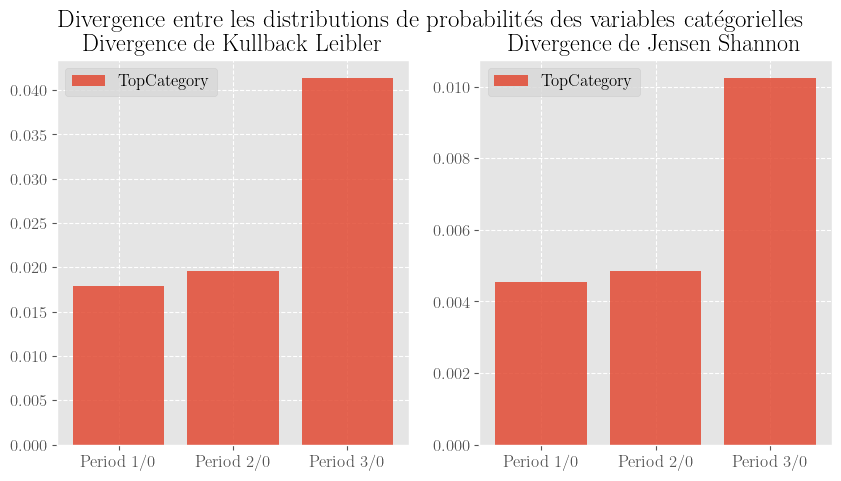

In [110]:
# Pour les données catégorielles, on peut utiliser la divergence de Kullback Leibler pour mesurer la distance entre deux distributions de probabilités.

def get_categorical_distribution(df):
    categorical_distribution = {}
    for column in df.columns:
        if df[column].dtype == 'object':
            categorical_distribution[column] = df[column].value_counts(normalize=True)
    return categorical_distribution

categorical_distribution_0 = get_categorical_distribution(df0)
categorical_distribution_1 = get_categorical_distribution(df1)
categorical_distribution_2 = get_categorical_distribution(df2)
categorical_distribution_3 = get_categorical_distribution(df3)

fig, ax = plt.subplots(1,2,figsize=(10, 5))

labels = ['Period 1/0', 'Period 2/0', 'Period 3/0']
for key in categorical_distribution_0.keys():
    KL_01 = KLDivergence(categorical_distribution_0[key], categorical_distribution_1[key])
    KL_02 = KLDivergence(categorical_distribution_0[key], categorical_distribution_2[key])
    KL_03 = KLDivergence(categorical_distribution_0[key], categorical_distribution_3[key])

    ax[0].bar(labels, [KL_01, KL_02, KL_03], label=key, alpha=0.85)
    ax[0].set_title('Divergence de Kullback Leibler')

    JSD_01 = JSDivergence(categorical_distribution_0[key], categorical_distribution_1[key])
    JSD_02 = JSDivergence(categorical_distribution_0[key], categorical_distribution_2[key])
    JSD_03 = JSDivergence(categorical_distribution_0[key], categorical_distribution_3[key])

    ax[1].bar(labels, [JSD_01, JSD_02, JSD_03], label=key, alpha=0.85)
    ax[1].set_title('Divergence de Jensen Shannon')

ax[0].legend()
ax[1].legend()
fig.suptitle('Divergence entre les distributions de probabilités des variables catégorielles', fontsize=18)

### Variables quantitatives

C:\Users\sacab\AppData\Local\Temp\ipykernel_14284\3472679042.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df0_n = df0 - df0.mean()
C:\Users\sacab\AppData\Local\Temp\ipykernel_14284\3472679042.py:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df0_n = df0 / df0.std()
C:\Users\sacab\AppData\Local\Temp\ipykernel_14284\3472679042.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select 

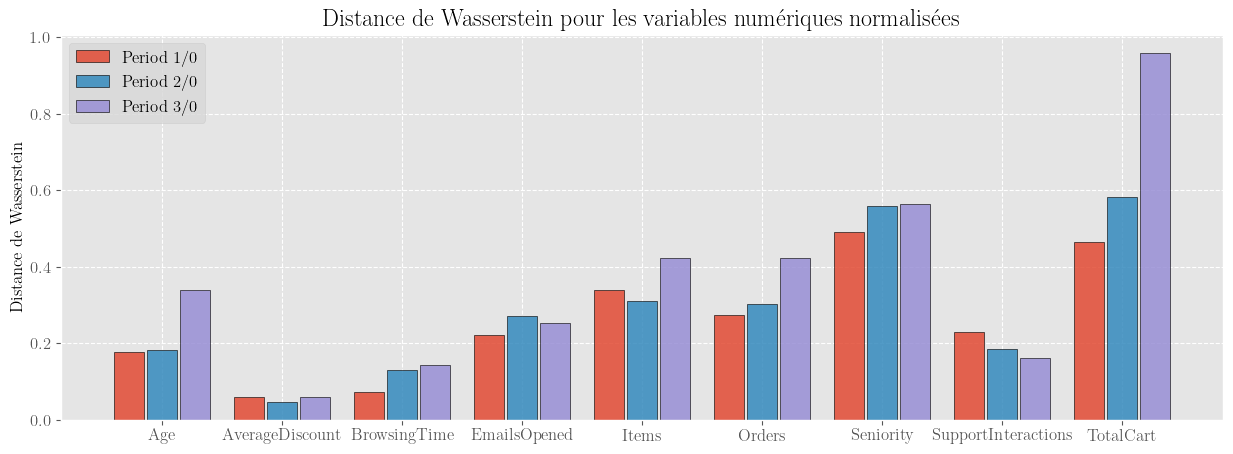

In [111]:
# Normalisation des données pour comparer leurs métriques entres elles.

df0_n = df0 - df0.mean()
df0_n = df0 / df0.std()

df1_n = df1 - df1.mean()
df1_n = df1 / df1.std()

df2_n = df2 - df2.mean()
df2_n = df2 / df2.std()

df3_n = df3 - df3.mean()
df3_n = df3 / df3.std()

# Pour les données numériques, on peut utiliser la distance de Wasserstein pour mesurer la distance entre deux vecteurs.

shifts = {}
labels = list(df0_n.columns[df0_n.dtypes != 'object'])
x = np.arange(len(labels))  # the label locations

p=2
width = 0.25
multiplier = 1.1

for label in labels:
    shifts[label] = (WassersteinDistance(df0_n[label], df1_n[label], p), WassersteinDistance(df0_n[label], df2_n[label], p), WassersteinDistance(df0_n[label], df3_n[label], p))

period_01 = [shifts[label][0] for label in labels]
period_02 = [shifts[label][1] for label in labels]
period_03 = [shifts[label][2] for label in labels]

plt.rcParams["grid.alpha"] = 1

fig, ax = plt.subplots(1,1, figsize=(15, 5))
offset = width * multiplier
ax.bar(x - offset, period_01, width, label='Period 1/0', alpha=0.85, edgecolor='black')
ax.bar(x, period_02, width, label='Period 2/0', alpha=0.85, edgecolor='black')
ax.bar(x + offset, period_03, width, label='Period 3/0', alpha=0.85, edgecolor='black')

ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Distance de Wasserstein pour les variables numériques normalisées')
ax.set_ylabel('Distance de Wasserstein')
plt.show()

### Matrice de corrélation

Nous allons maintenant étudier la corrélation entre les différentes variables. Pour cela, on va calculer la matrice de corrélation entre les variables quantitatives sur chaque période.

C:\Users\sacab\AppData\Local\Temp\ipykernel_14284\3574861308.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = [df0.corr(), df1.corr(), df2.corr(), df3.corr()]


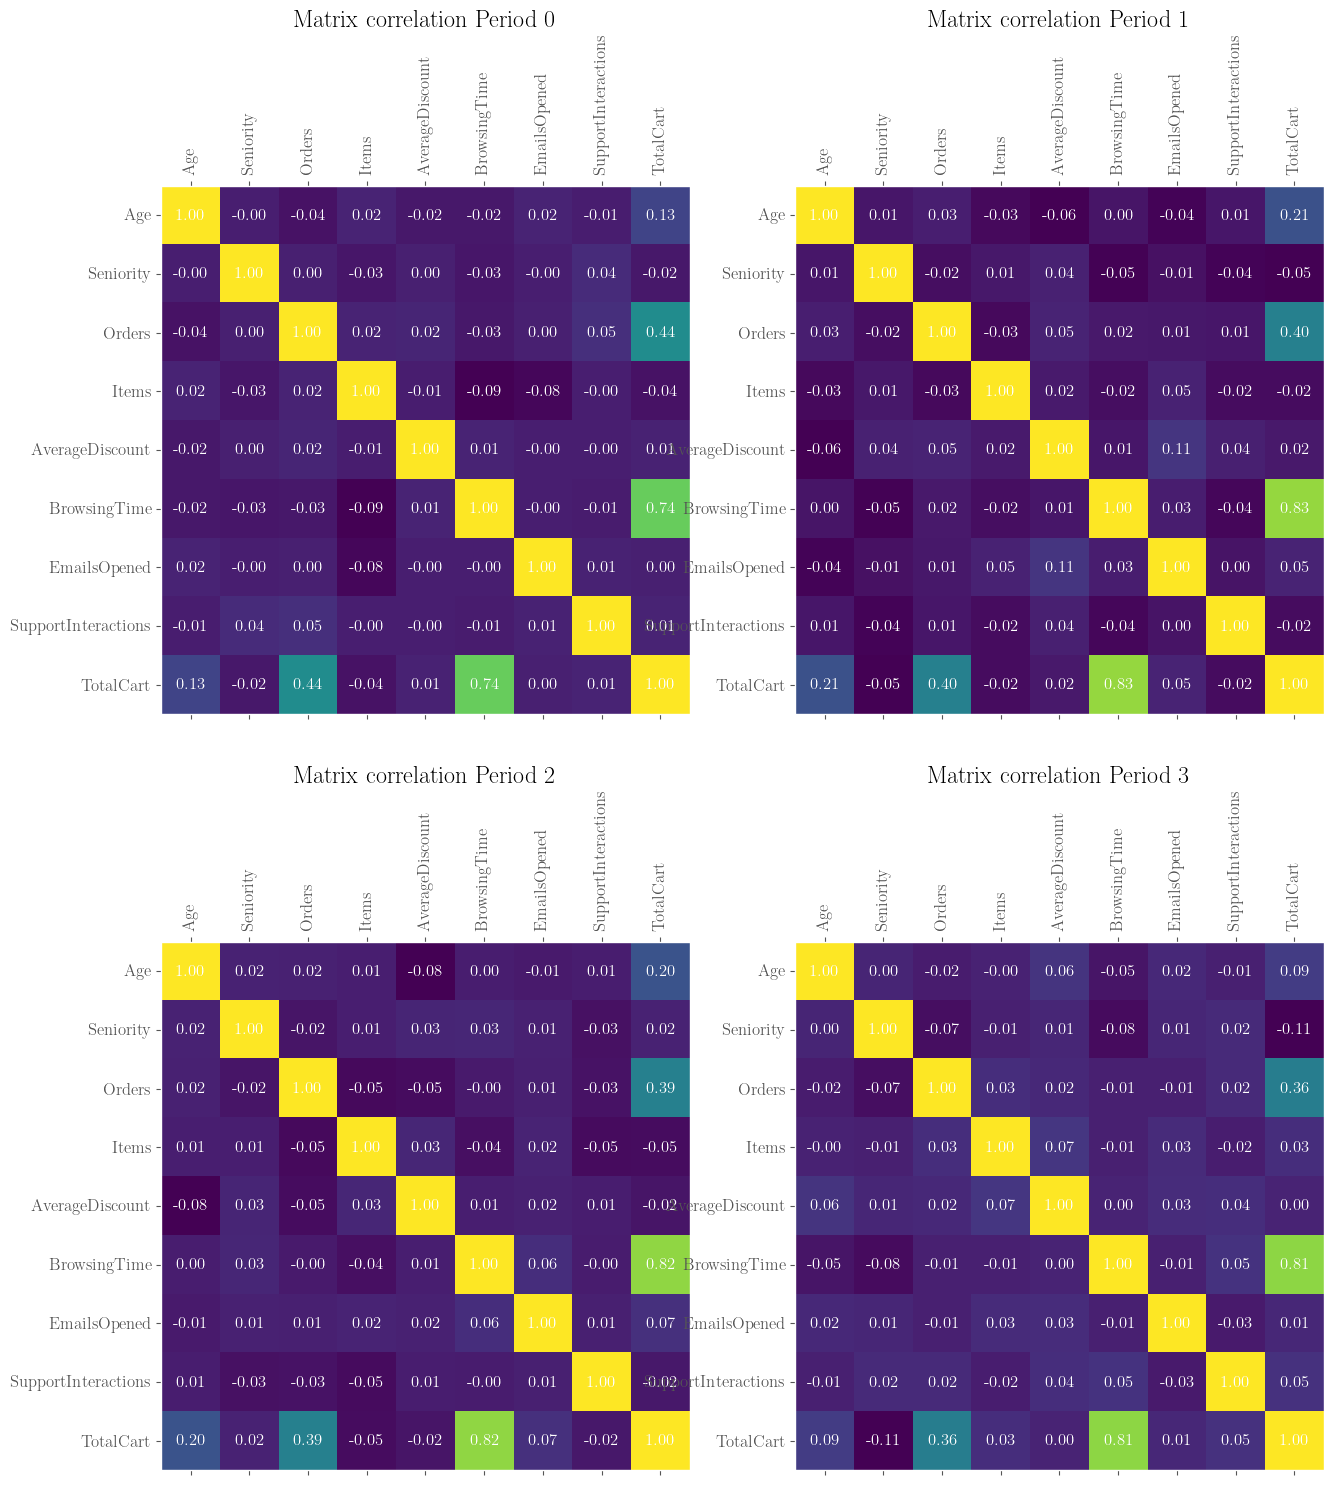

In [112]:
# Compute a matrix correlation between features

corrs = [df0.corr(), df1.corr(), df2.corr(), df3.corr()]


# Plot the matrix correlation

# plt.rcParams["grid.alpha"] = 0

# fig, ax = plt.subplots(figsize=(7, 7))
# ax.matshow(corr)
# plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
# plt.yticks(range(len(corr.columns)), corr.columns)
# for (i, j), z in np.ndenumerate(corr):
#     ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color='white')
# plt.title('Matrix correlation between features')
# plt.show()
plt.rcParams["grid.alpha"] = 0
fig, ax = plt.subplots(2,2, figsize=(15, 18))
for i,corr in enumerate(corrs):
    ax[i//2][i%2].matshow(corr)
    ax[i//2][i%2].set_xticks(range(len(corr.columns)))
    ax[i//2][i%2].set_xticklabels(corr.columns, rotation=90)
    ax[i//2][i%2].set_yticks(range(len(corr.columns)))
    ax[i//2][i%2].set_yticklabels(corr.columns)
    for (k, l), z in np.ndenumerate(corr):
        ax[i//2][i%2].text(l,k, '{:0.2f}'.format(z), ha='center', va='center', color='white')
    ax[i//2][i%2].set_title('Matrix correlation Period {}'.format(i))
plt.show()

Les différentes matrices de corrélations montrent que pour chaque période, les variables `BrowsingTime`, `Orders`, et `Age` sont fortement corrélées avec `TotalCart`, variable que l'on tente de prédire. Cela signifie que la dérive des variables `BrowsingTime`, `Orders`, et `Age` a un impact plus important sur la dérive du modèle. De plus, les coefficients de corrélations sont différents d'une période à l'autre, témoignant aussi de la dérive des données (Concept shift).


### Distributions des variables

Text(0.5, 0.98, 'Histogramme des variables numériques entre les périodes 0 et 3')

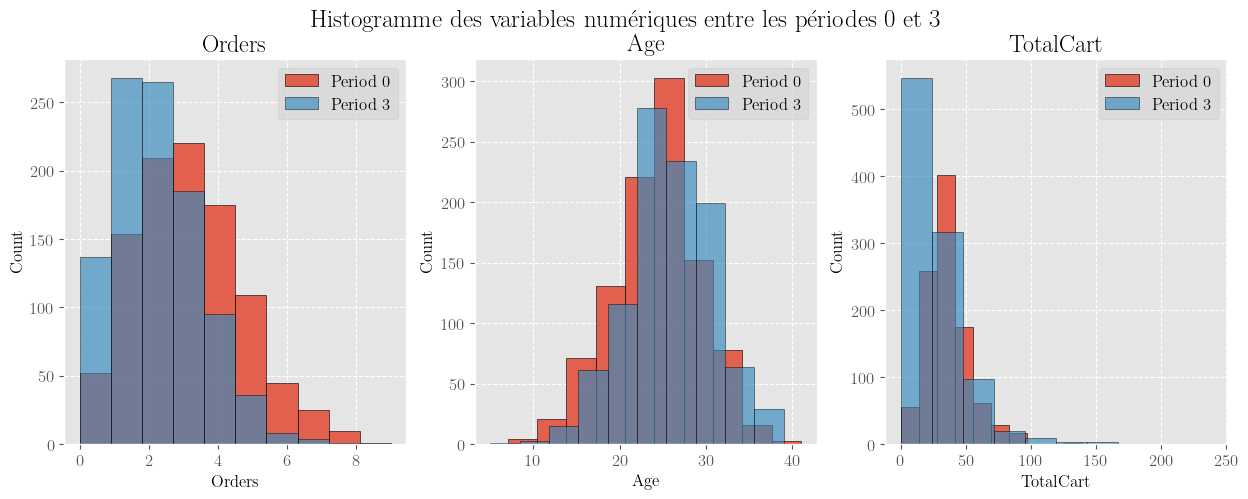

In [113]:
selected_features = ['Orders', 'Age', 'TotalCart']

plt.rcParams["grid.alpha"] = 1
fig, ax = plt.subplots(1,len(selected_features), figsize=(15, 5))
for i,feature in enumerate(selected_features):
    ax[i].hist(df0[feature], label='Period 0', alpha=0.85, edgecolor='black')
    ax[i].hist(df3[feature], label='Period 3', alpha=0.65, edgecolor='black')
    ax[i].set_title(feature)
    ax[i].legend()
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('Count')
    # plot a line showing the expected distribution
fig.suptitle('Histogramme des variables numériques entre les périodes 0 et 3', fontsize=18)

Text(0.5, 0.98, 'Densité des variables numériques entre les périodes 0 et 3')

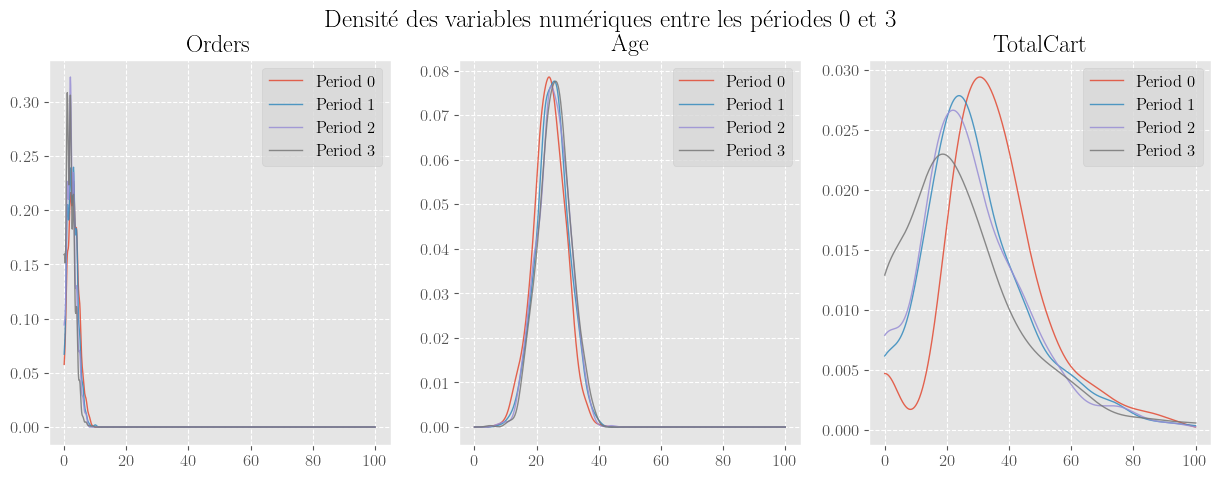

In [114]:
from scipy.stats import gaussian_kde





x = np.linspace(0,100,n_samples)

fig, ax = plt.subplots(1,len(selected_features), figsize=(15, 5))
for i,feature in enumerate(selected_features):
    ax[i].plot(x,gaussian_kde(df0[feature])(x), label='Period 0', alpha=0.85)
    ax[i].plot(x,gaussian_kde(df1[feature])(x), label='Period 1', alpha=0.85)
    ax[i].plot(x,gaussian_kde(df2[feature])(x), label='Period 2', alpha=0.85)
    ax[i].plot(x,gaussian_kde(df3[feature])(x), label='Period 3', alpha=0.85)
    ax[i].set_title(feature)
    ax[i].legend()

fig.suptitle('Densité des variables numériques entre les périodes 0 et 3', fontsize=18)


Ces histogrammes et densité de distributions confirment les résultats précédents. Les moyennes et variances des distributions des variables sont très différentes d'une période à l'autre.



### Résultats

Les figures précédentes permettent d'analyser visuellement la dérive des données. En comparant les distance (resp divergences) des variables catégorielles (resp quantitatives) des périodes 1, 2 et 3 par rapport à la 0, on remarque que les données s'éloignent plus ou moins de la distribution initiale. Certaines ont une dérive croissante et d'autres se rapproche à nouveau de la distribution initiale.

En particulier, les colonnes `Seniority`, `Items` ou `Orders` sont celles qui ont le plus de dérive. (Covariate shift)

La variable target `TotalCart` a une dérive croissante. (Prior Prabability shift)

De plus, la matrice de corrélation pour la période 0 montre sur sa dernière colonne (ou dernière ligne) que la variable `Seniority` est peu corrélée avec `TotalCart` que l'on tente de prédire. Cela signifie que la dérive de `Seniority` a moins d'impact sur la dérive du modèle. En revanche la dérive de `Orders` a un impact plus important sur la dérive du modèle étant donné que ces deux variables semblent corrélées.


## Etude de la dérive du modèle

Pour étudier la dérive du modèle, on va calculer la métrique quantitative sur les prédictions effectuées par le modèle `RandomTreeRegressor` sur les périodes 1, 2 et 3, entraîné sur la période 0. On va ensuite représenter ces métriques sur un graphique.

Text(0, 0.5, 'Distance de Wasserstein')

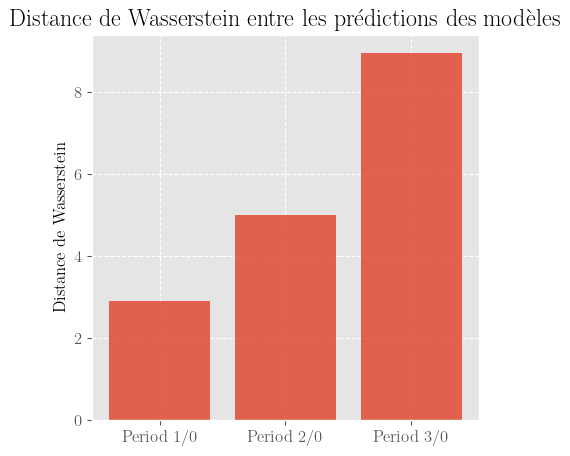

In [115]:
model = model2

pred_0 = model.predict(X0)
pred_1 = model.predict(X1)
pred_2 = model.predict(X2)
pred_3 = model.predict(X3)

plt.rcParams["grid.alpha"] = 1

fig, ax = plt.subplots(1,1,figsize=(5, 5))

distance_01 = WassersteinDistance(pred_0, pred_1, p)
distance_02 = WassersteinDistance(pred_0, pred_2, p)
distance_03 = WassersteinDistance(pred_0, pred_3, p)

ax.bar(['Period 1/0', 'Period 2/0','Period 3/0'], [distance_01, distance_02, distance_03], alpha=0.85)
ax.set_title('Distance de Wasserstein entre les prédictions des modèles')
ax.set_ylabel('Distance de Wasserstein')



Comme on l'a vu précédemment, la dérive dans les données induit une dérive du modèle qui dégrade le résultat des prédicitons au fil des périodes. La figure précédente montre que la métrique de dérive du modèle est croissante au fil des périodes. Cela signifie que le modèle doit être mis à jour pour s'adapter à la dérive des données.

## Amélioration du modèle

En vu de cette analyse exploratoire des données, le modèle peut être mis à jour pour améliorer sa performance.

In [140]:
# Prepare Training Data 

X0 = df0.iloc[:, 0:n_features-1]
y0 = df0.iloc[:, n_features-1]

# Prepare Test Data

X1 = df1.iloc[:, 0:n_features-1]
y1 = df1.iloc[:, n_features-1]

X2 = df2.iloc[:, 0:n_features-1]
y2 = df2.iloc[:, n_features-1]

X3 = df3.iloc[:, 0:n_features-1]
y3 = df3.iloc[:, n_features-1]

# Create dummy variables for categorical features

X0 = pd.get_dummies(X0)
X1 = pd.get_dummies(X1)
X2 = pd.get_dummies(X2)
X3 = pd.get_dummies(X3)

### Enlever des variables pertinentes

On peut dans un premier temps essayer de retirer les variables qui ont le plus de dérive et qui sont le plus corrélées à la variable target `TotalCart`.

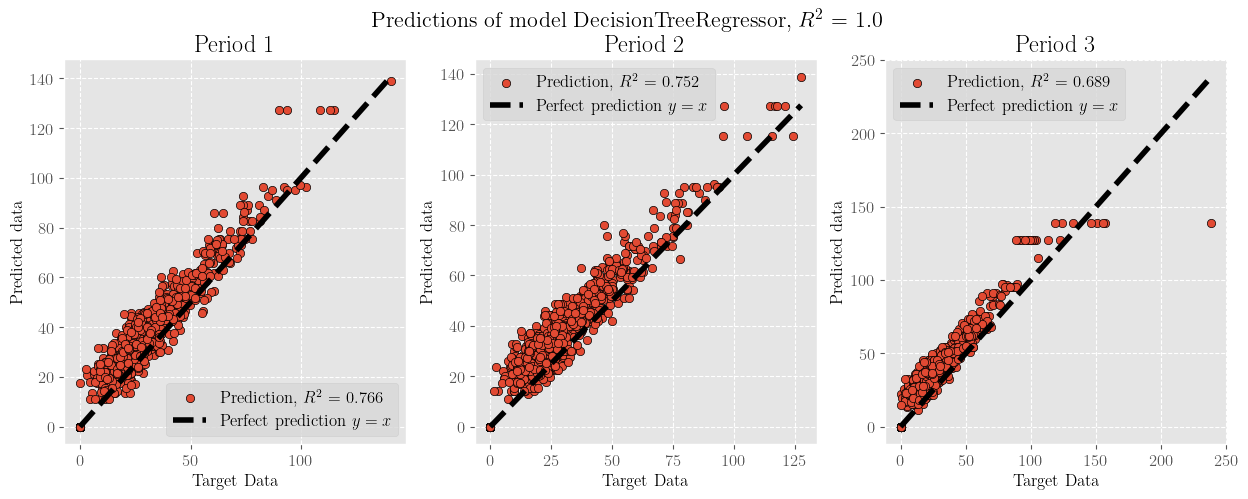

In [117]:
features_to_drop = [ 'Items', 'Seniority', 'Age']
# features_to_drop = [ 'Age']


train_and_test(model2, X0.drop(features_to_drop, axis=1), X1.drop(features_to_drop, axis=1), X2.drop(features_to_drop, axis=1), X3.drop(features_to_drop, axis=1), y0, y1, y2, y3)

### Importance weighting

Kernel Mean Matching (KMM) is a well-known method for bias correction by estimating density ratio between training and test data distribution. This mechanism re- weights training data instances so that their weighted data distribution resembles that of the observed test data distribution.


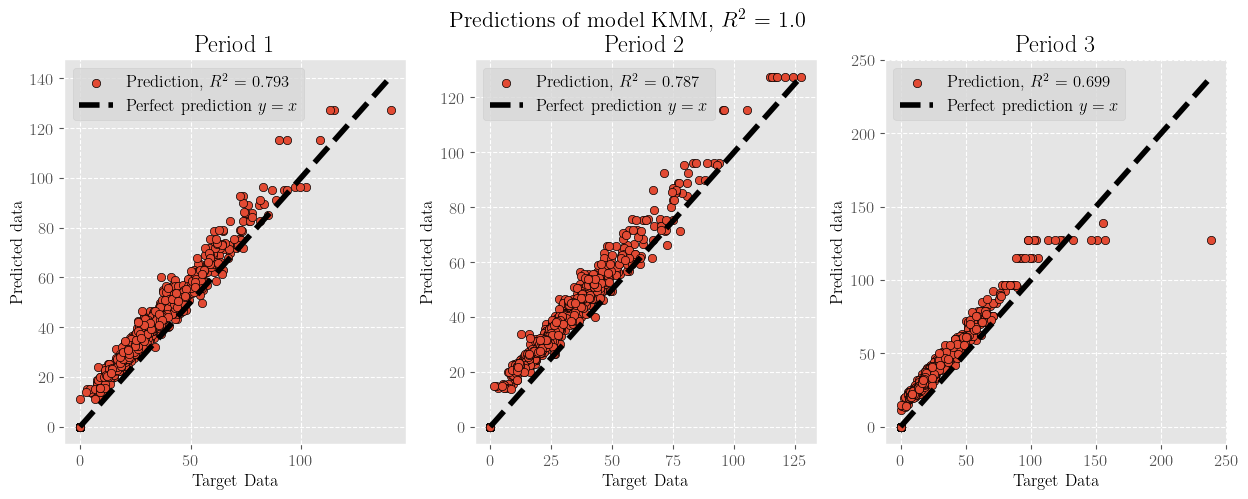

In [223]:
from adapt.instance_based import KMM

KMM_model = KMM(estimator=model2, Xt = X2, kernel="sigmoid", verbose=0, random_state=0, B = 10000)

train_and_test(KMM_model, X0, X1, X2, X3, y0, y1, y2, y3)

In [231]:
from adapt.instance_based import KMM

KMM_model = KMM(estimator=model2, Xt = X2, kernel='sigmoid', verbose=0, random_state=0, B = 10000)

KMM_model.fit(X0, y0)
# KMM_model.fit_estimator(X0, y0, KMM_model.weights_)
# KMM_model.fit_weights(X0, KMM_model.Xt)
print(KMM_model.score(X1, y1))
print(KMM_model.score(X2, y2))
print(KMM_model.score(X3, y3))

0.7933183263894348
0.7867054073329418
0.6991919039500033
